# Trabalho da aula 5

## Computador conceitual

In [1]:
from IPython.display import Image
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import math

Caso 1


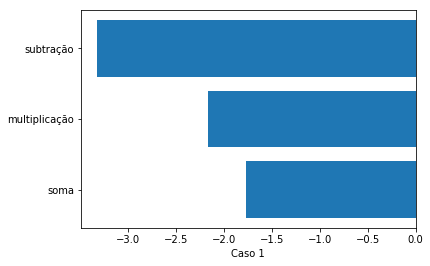

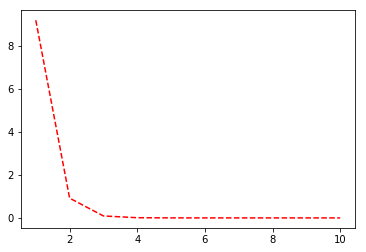

In [51]:
def trunc(n, t, mi,ma):
    k=0
    nmr = n
    f,d= np.modf(n)
    if d!=0:
        while d != 0:
            n/=10
            k+=1
            f,d = np.modf(n)
    else:
        while f<0.1:
            n*=10
            k-=1
            f,d=np.modf(n)
    #contagem de dígitos
    nr=n
    ds=0
    tru = 0
    while nr>.0:
        nr*=10
        nr,d = np.modf(nr)
        #print(nr)
        ds+=1
    if ds>t:
        #aplicar truncamento
        tru = n
    return tru
#arredondamento
def arr(n, t, mi,ma):
    k=0
    nmr = n
    f,d= np.modf(n)
    if d!=0:
        while d != 0:
            n/=10
            k+=1
            f,d = np.modf(n)
    else:
        while f<0.1:
            n*=10
            k-=1
            f,d=np.modf(n)
    #contagem de dígitos
    nr=n
    ds=0
    arr = 0
    while nr>.0:
        nr*=10
        nr,d = np.modf(nr)
        #print(nr)
        ds+=1
    if ds>t:
        #aplicar arredondamento
        arr = (n+10**(-ma))
    return arr

def comp():
    t = 3
    mi = -3
    ma = 3
    x = npr.random()
    y = npr.random()
    z = npr.random()
    w = npr.random()
    medias = []
    mediam = []
    mediasb = []
    mediast = []
    mediasa = []
    # arredondamento
    print("Caso 1")
    for _ in range(0,100):
        xa = arr(x,t,mi,ma)
        ya = arr(y,t,mi,ma)
        za = arr(z,t,mi,ma)
        wa = arr(z,t,mi,ma)
        u = (x+y)*z-w
        #erro relativo da soma
        erx = (x - xa)/xa
        ery = (y - ya)/ya
        erz = (z - za)/za
        erw = (w - wa)/wa
        erxy = erx*(xa/(xa-ya))+ery*(ya/(xa+ya))
        medias.append(erxy)
        #erro relativo na multiplicação
        #m=(x+y)
        #m*z
        ermz = erxy+erz
        mediam.append(ermz)
        #erro relativo na subtração
        #sub = (x+y)*z
        #sub - w
        ma = arr((x+y)*z,t,mi,ma)
        ersubw = ermz*(ma/(ma-wa))+erw*(wa/(ma+wa))
        mediasb.append(ersubw)
    avs = np.average(medias)
    avm = np.average(mediam)
    avsb = np.average(mediasb)
    data = {
        'soma':avs,
        'multiplicação':avm,
        'subtração':avsb
    }
    _,ax = plt.subplots()
    ax.set(xlabel="Caso 1")
    ax.barh(list(data.keys()),list(data.values()))
    medias = []
    mediam = []
    mediasb = []
    tms = []
    tmm = []
    for _ in range(0,100):
        #truncamento
        xa = trunc(x,t,mi,ma)
        ya = trunc(y,t,mi,ma)
        za = trunc(z,t,mi,ma)
        wa = trunc(z,t,mi,ma)
        u = (x+y)*z-w
        #erro relativo da soma
        erx = (x - xa)/xa
        ery = (y - ya)/ya
        erz = (z - za)/za
        erw = (w - wa)/wa
        erxy = erx*(xa/(xa-ya))+ery*(ya/(xa+ya))
        medias.append(erxy)
        #erro relativo na multiplicação
        #m=(x+y)
        #m*z
        ermz = erxy+erz
        mediam.append(ermz)
        #erro relativo na subtração
        #sub = (x+y)*z
        #sub - w
        ma = arr((x+y)*z,t,mi,ma)
        ersubw = ermz*(ma/(ma-wa))+erw*(wa/(ma+wa))
        #erro relativo no arredondamento
        eru = (ma/(ma - wa)+0.5)*10**(1-t)
        mediasa.append(eru)
        #erro relativo no truncamento da operação
        erut = (ma/(ma - wa))*10**(1-t)
        mediast.append(erut)
        mediasb.append(ersubw)
    avs = np.average(medias)
    avm = np.average(mediam)
    avsb = np.average(mediasb)
    ava = np.average(mediasa)
    avt = np.average(mediast)
    data = {
        'soma':avs,
        'multiplicação':avm,
        'subtração':avsb,
        'truncamento':avt,
        'arredondamento':ava
    }
    _,ax = plt.subplots()
    ax.set(xlabel="Caso 2")
    ax.barh(list(data.keys()),list(data.values()))
    #extra
    ts = np.linspace(1,10,num=10)
    ma = arr((x+y)*z,t,mi,ma)
    wa = arr(w,t,mi,ma)
    erro = (ma/(ma-wa)+0.5)*10**(1-ts)
    plt.subplot()
    plt.plot(ts,erro,'r--')
comp()
